## **Задание**
Даны два набора данных (взяты с Росстата):
1. data1 — сумма осадков в мм за июль 2022 г. по субъектам РФ;
2. data2 — индекс стоимости жизни* по городам Центрального федерального округа в 2023 г.

*Индекс стоимости жизни — показатель, измеряющий относительную стоимость набора товаров и услуг в отдельных городах по сравнению с ее среднероссийским значением.

Необходимо для каждого набора:
1. Построить гистограмму частот и гистограмму относительных частот;
2. Построить эмпирическую функцию распределения;
3. Вывести описательную статистику: среднее, дисперсия, медиана, мода, коэффициент асимметрии, эксцесс. О чем говорят полученные значения коэффициента асимметрии и эксцесса?

В качестве отчетности требуется до дедлайна прикрепить файл с кодом на Python и файл с небольшими комментариями о ходе выполнения работы (0.5 — 1 страница). Если делаете в Jupyter Notebook, то комментарии можно писать сразу там в текстовых ячейках. 

Библиотеки, которые понадобяться для дальнейших вычислений

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import statistics as st
import scipy.stats as s

вытащу необходимые данные из текстового файла

In [3]:
with open('Task1_stats.txt', 'r') as file:
    data = file.read()

data1 = [int(x) for x in re.findall(r'\d+', data.split('=')[1])]
data2 = [float(x) for x in re.findall(r'\d+\.\d+', data.split('=')[2])]

# 1. Построить гистограмму частот и гистограмму относительных частот.

### 1.1 Гистограмма частот для data1.

Определяем кол-во столбцов гистограммы (беру 10), высчитываем с histogram и строим график

Text(0, 0.5, 'Частота')

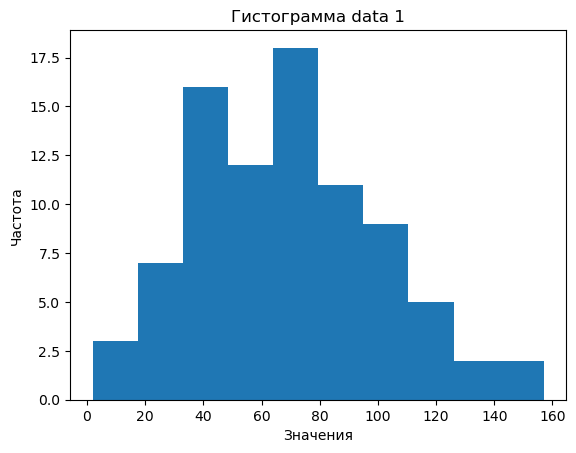

In [4]:
num_bins =  10
hist1, bin_edges1 = np.histogram(data1, bins=num_bins, density=False)

plt.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), align="edge")
plt.title("Гистограмма data 1")
plt.xlabel("Значения")
plt.ylabel("Частота")

Text(0, 0.5, 'Относительная частота')

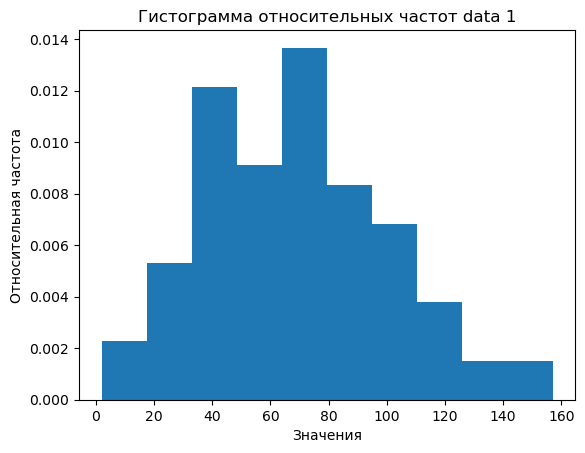

In [5]:
plt.hist(data1, bins=10, density=True)
plt.title("Гистограмма относительных частот data 1")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")

### 1.2 Гистограмма частот для data2

Определяем кол-во столбцов гистограммы (беру 10(определенна num_bins с data1)), высчитываем с histogram и строим графики

Text(0, 0.5, 'Частота')

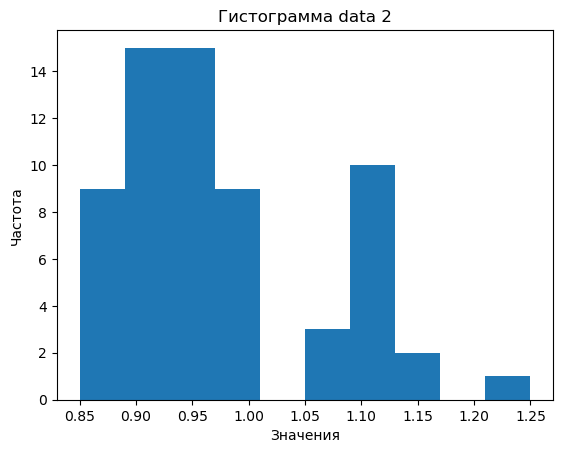

In [6]:
hist2, bin_edges2 = np.histogram(data2, bins=num_bins, density=False)
plt.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), align="edge")
plt.title("Гистограмма data 2")
plt.xlabel("Значения")
plt.ylabel("Частота")

Text(0, 0.5, 'Относительная частота')

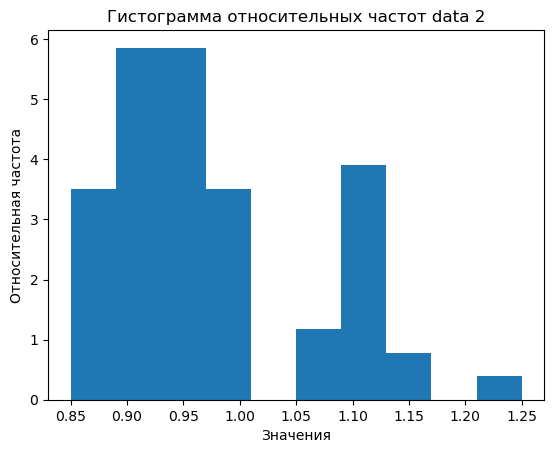

In [19]:

plt.hist(data2, bins=10, density=True)
plt.title("Гистограмма относительных частот data 2")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")

## Эмпирическая функция  распределения для data 1

 считаем количество значений $\leq$ каждому значению

In [8]:
sorted_data = sorted(data1)
efr = []
n = len(sorted_data)
for i in range(n):
    efr.append((i + 1) / n)

Text(0.5, 1.0, 'Эмпирическая функция распределения data 1')

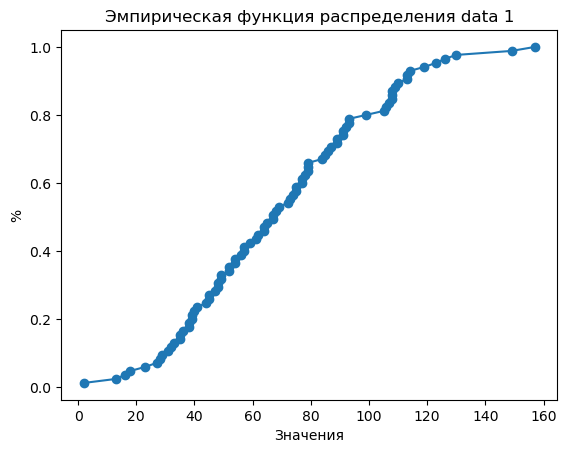

In [18]:
# строим график
plt.plot(sorted_data, efr, marker='o')
plt.xlabel('Значения')
plt.ylabel('%')
plt.title('Эмпирическая функция распределения data 1')

## Эмпирическая функция распределения data 2

аналогично как и для data 1,  считаем количество значений $\leq$ каждому значению

In [ ]:
sorted_data = sorted(data2)
efr = []
n = len(sorted_data)
for i in range(n):
    efr.append((i + 1) / n)

Text(0.5, 1.0, 'Эмпирическая функция распределения data 1')

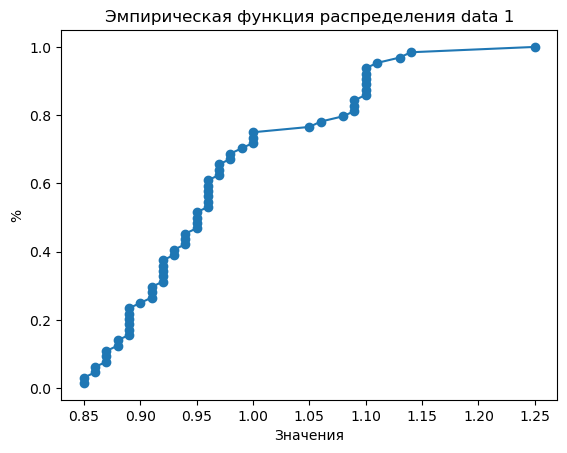

In [72]:
# строим график
plt.plot(sorted_data, efr, marker='o')

plt.xlabel('Значения')
plt.ylabel('%')
plt.title('Эмпирическая функция распределения data 1')

# 3. Вывести описательную статистику: среднее, дисперсия, медиана, мода, коэффициент асимметрии, эксцесс. О чем говорят полученные значения коэффициента асимметрии и эксцесса?

## 3.1 Описательная статистика для data1

- Среднее

In [34]:
st.mean(data1)

69.62352941176471

- Дисперсия

In [35]:
st.variance(data1)

1061.7851540616246

- Мода

In [36]:
st.mode(data1)

79

- Коэффициент асимметрии

In [47]:
s.skew(data1)

0.3363568392687284

- Эксцесс

In [48]:
s.kurtosis(data1)

-0.39101330396139344

*- положительный коэффициент ассиметрии показывает, что ассиметрия правосторонняя*

*- отрицательный эксцесс показывает, что кривая является более плосковершинной, более пологой по сравнению с нормальным распределением*

## 3.2 Описательная статистика для data2

- Среднее

In [49]:
st.mean(data2)

0.97109375

- Дисперсия

In [51]:
st.variance(data2)

0.007949578373015876

- Мода

In [53]:
st.mode(data2)

0.96

- Коэффициент асимметрии

In [58]:
s.skew(data2) 

0.8482327764492431

- Эксцесс

In [59]:
s.kurtosis(data2)

0.044434390527769096

*- положительный коэффициент ассиметрии показывает, что ассиметрия правосторонняя*

*- положительный эксцесс показывает, что кривая является более островершнной, более вытянутой по сравнению с нормальным распределением*